In [1]:
from datetime import timedelta
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from statsmodels.nonparametric.smoothers_lowess import lowess

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from lib import y_smooth, go_chart, distribution, chart_distribution

import colorlover as cl
from IPython.display import HTML
colors = cl.scales['11']['div']['RdYlBu']
colors = colors[:5] + ['rgb(183,188,143)','rgb(143,188,143)'] + colors[8:]
HTML(cl.to_html(colors))

In [2]:
xls = pd.ExcelFile("coronav_20200326.xls")
cases = xls.parse('cases')
deaths = xls.parse('deaths')
recovery = xls.parse('recovery')

cases['date'] = pd.to_datetime(cases['date'])
deaths['date'] = pd.to_datetime(cases['date'])
recovery['date'] = pd.to_datetime(recovery['date'])

cases = cases.set_index('date')
deaths = deaths.set_index('date')
recovery = recovery.set_index('date')

try:
    del cases['Unnamed: 0']
    del deaths['Unnamed: 0']
    del recovery['Unnamed: 0']
except:
    print ('no Unnamed: 0')

no Unnamed: 0


# daily by country

$ A = 979.540\  \mu = 32.786\  \sigma = 8.645\ k = -1.566 $


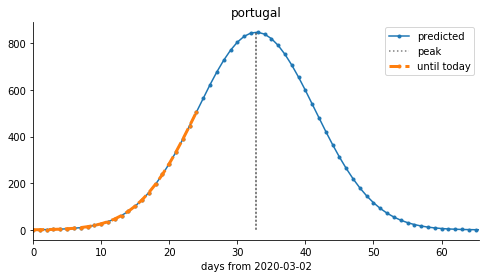

$ A = 5603.230\  \mu = 31.985\  \sigma = 9.010\ k = 96.612 $


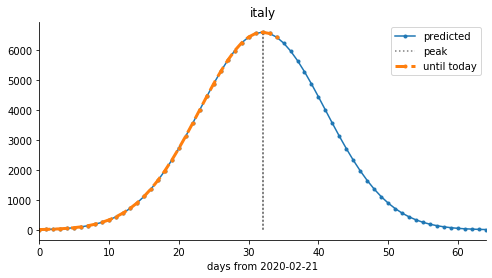

$ A = 18956.931\  \mu = 51.049\  \sigma = 16.329\ k = -259.193 $


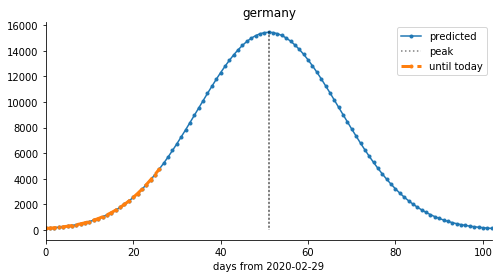

/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



$ A = 16631733.957\  \mu = 137.268\  \sigma = 28.892\ k = -273.810 $


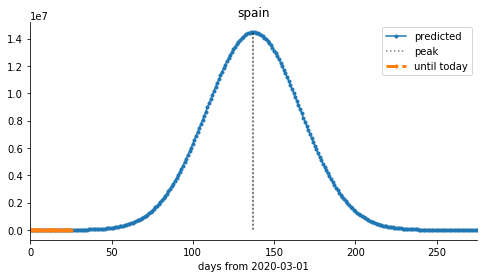

/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



$ A = 2517293.798\  \mu = 144.783\  \sigma = 32.129\ k = -132.870 $


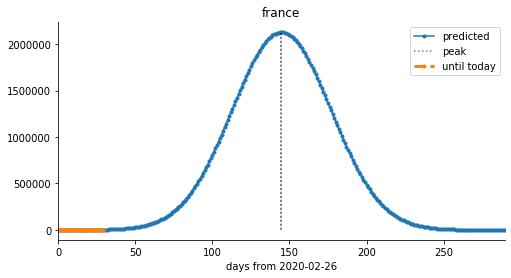

/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



$ A = 65908518.529\  \mu = 147.791\  \sigma = 26.662\ k = -5.983 $


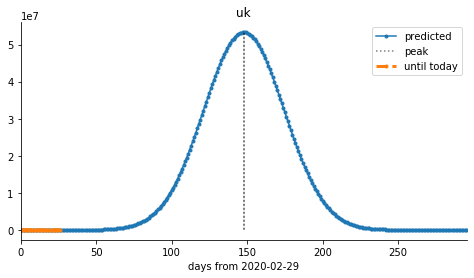

$ A = 33725.272\  \mu = 27.341\  \sigma = 7.879\ k = -108.791 $


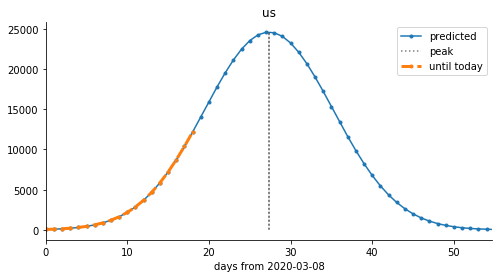

$ A = 4327.600\  \mu = 17.998\  \sigma = 7.164\ k = 42.306 $


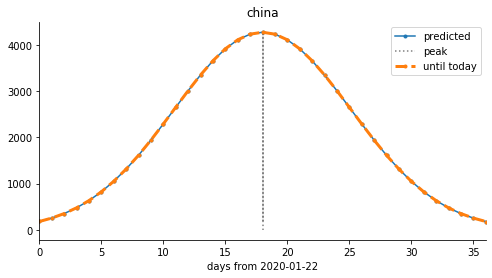

$ A = 623.046\  \mu = 12.877\  \sigma = 3.737\ k = 88.809 $


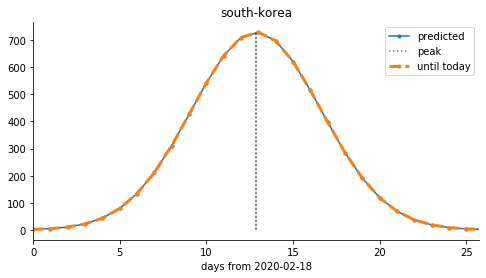

$ A = 213129.658\  \mu = 412.171\  \sigma = 1203.421\ k = -200937.967 $


/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



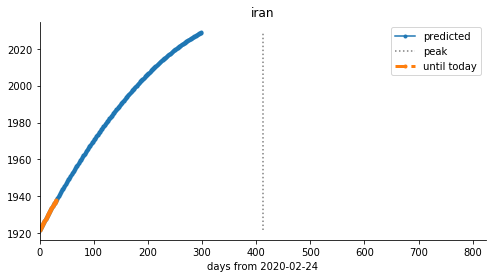

In [8]:
for col in cases.columns:
        
    mindate = min(cases.loc[cases[col].notnull()].index)-timedelta(days=1)
    y = cases.loc[cases[col].index>=mindate,col].fillna(0)
    x = np.arange(len(y))
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y,res_print=True)
    chart_distribution(y,ydata,col,ylabel='daily cases',prediction=True)
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y)
    y_div = y_axis*sorted(y.values)[-3]*1.1/max(y_axis[:len(y)])

    plt.figure(figsize=(8,4))
    plt.title(col)
    plt.plot(x_axis, y_div, '.-',label='predicted')
    plt.plot(c[1]*np.ones(len(y_div)), y_div, ':k',alpha=.5,label='peak')
    plt.plot(x_axis[:len(y)], y_div[:len(y)], '.--',lw=3,color='C1',label='until today')
    plt.xlim([0,c[1]*2])
    plt.xlabel('days from %s'%str(y.index[0])[:10])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    plt.show()

/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



$ A = 93807.776\  \mu = 78.045\  \sigma = 15.651\ k = -0.527 $


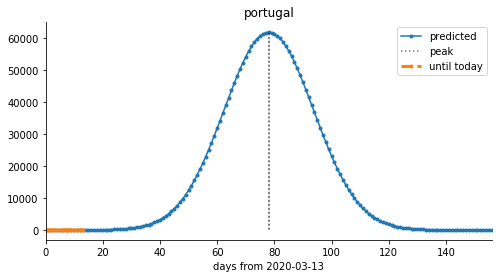

$ A = 897.314\  \mu = 33.069\  \sigma = 10.545\ k = -9.914 $


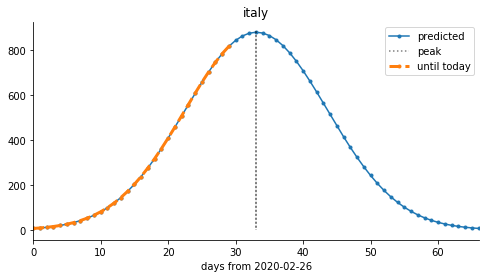

/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



$ A = 1749344.182\  \mu = 105.822\  \sigma = 18.926\ k = 0.101 $


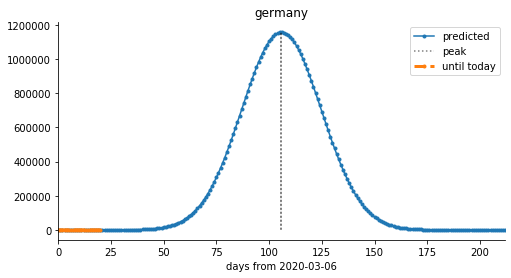

$ A = 793.305\  \mu = 25.262\  \sigma = 5.439\ k = 12.977 $


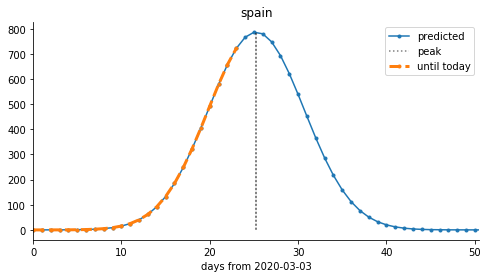

$ A = 4952415.302\  \mu = 120.840\  \sigma = 20.291\ k = 0.351 $


/home/emanuele/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning:

Number of calls to function has reached maxfev = 1000.



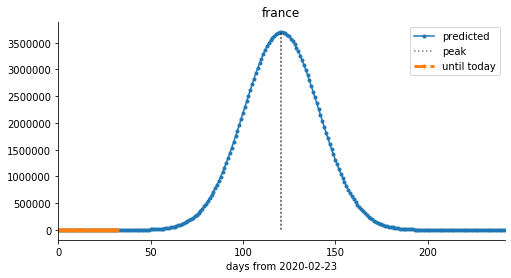

$ A = 592.345\  \mu = 51.245\  \sigma = 14.320\ k = -2.937 $


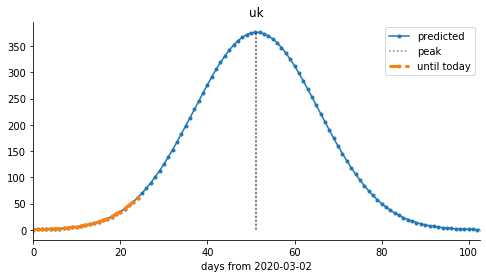

$ A = 290.894\  \mu = 28.473\  \sigma = 3.872\ k = 5.827 $


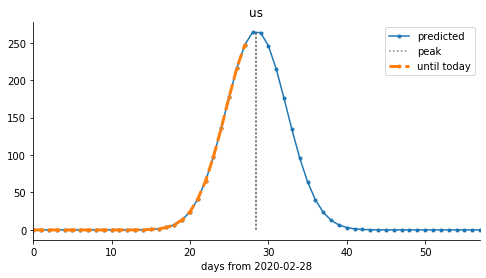

$ A = -75.673\  \mu = 55.245\  \sigma = 10.996\ k = 75.566 $


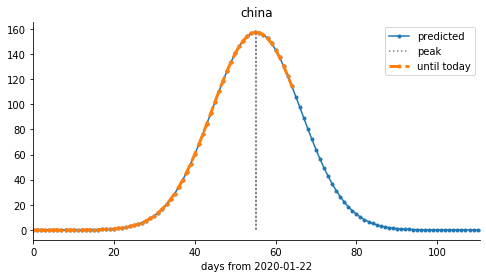

$ A = 7563.265\  \mu = 84.261\  \sigma = 1949.733\ k = -7555.398 $


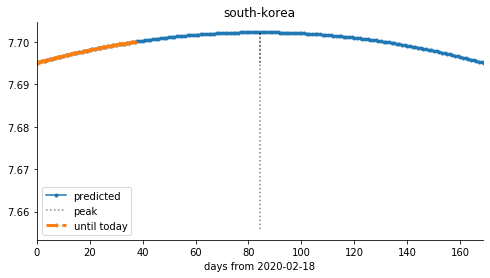

$ A = -175.377\  \mu = 7.005\  \sigma = 13.856\ k = 169.683 $


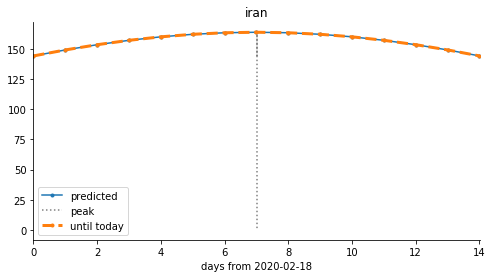

In [9]:
for col in deaths.columns:
        
    mindate = min(deaths.loc[deaths[col].notnull()].index)-timedelta(days=3)
    y = deaths.loc[deaths[col].index>=mindate,col].fillna(0)
    x = np.arange(len(y))
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y,res_print=True)
    chart_distribution(y,ydata,col,ylabel='daily deaths',prediction=True)
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y)
    y_div = y_axis*sorted(y.values)[-3]*1.1/max(y_axis[:len(y)])

    plt.figure(figsize=(8,4))
    plt.title(col)
    plt.plot(x_axis, y_div, '.-',label='predicted')
    plt.plot(c[1]*np.ones(len(y_div)), y_div, ':k',alpha=.5,label='peak')
    plt.plot(x_axis[:len(y)], y_div[:len(y)], '.--',lw=3,color='C1',label='until today')
    plt.xlim([0,c[1]*2])
    plt.xlabel('days from %s'%str(y.index[0])[:10])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    plt.show()

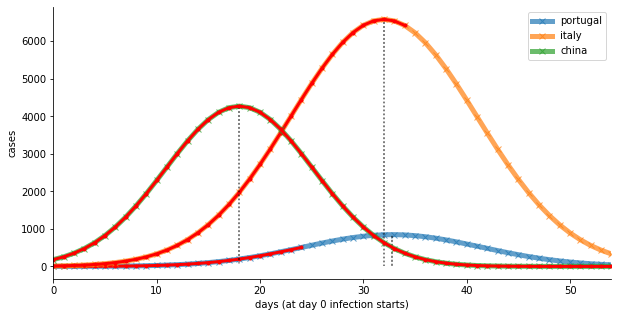

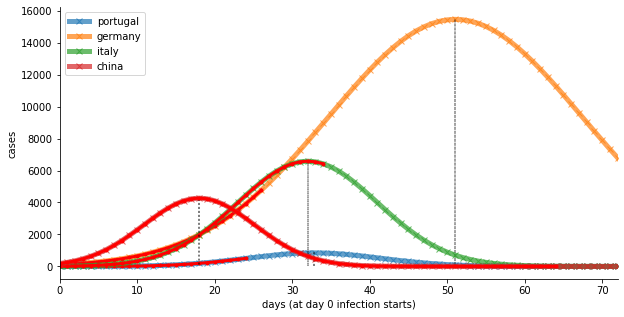

In [5]:
import matplotlib.dates as mdates

cols = ['C0','C1','C2','C3']

plt.figure(figsize=(10,5))

for i,col in enumerate(['portugal','italy','china']):
        
    mindate = min(cases.loc[cases[col].notnull()].index)-timedelta(days=1)
    y = cases.loc[cases.index>=mindate,col].fillna(0)
    x = np.arange(len(y))
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y)

    y_div = y_axis*sorted(y.values)[-3]*1.1/max(y_axis[:len(y)])
    
    plt.plot(x_axis, y_div, 'x-',lw=5, color=cols[i], alpha=.7,label=col)
    plt.plot(c[1]*np.ones(len(y_div)), y_div, ':k', alpha=.5)
    plt.plot(x_axis[:len(y)], y_div[:len(y)], '.-r',lw=3)
    plt.xlim([0,c[1]*3])
    plt.ylabel('cases')
    plt.xlabel('days (at day 0 infection starts)')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    
plt.show()

import matplotlib.dates as mdates

cols = ['C0','C1','C2','C3']

plt.figure(figsize=(10,5))

for i,col in enumerate(['portugal','germany','italy','china']):
        
    mindate = min(cases.loc[cases[col].notnull()].index)-timedelta(days=1)
    y = cases.loc[cases.index>=mindate,col].fillna(0)
    x = np.arange(len(y))
    
    xdata, ydata, x_axis, y_axis, c = distribution(x,y)

    y_div = y_axis*sorted(y.values)[-3]*1.1/max(y_axis[:len(y)])
    
    plt.plot(x_axis, y_div, 'x-',lw=5, color=cols[i], alpha=.7,label=col)
    plt.plot(c[1]*np.ones(len(y_div)), y_div, ':k', alpha=.5)
    plt.plot(x_axis[:len(y)], y_div[:len(y)], '.-r',lw=3)
    plt.xlim([0,c[1]*4])
    plt.ylabel('cases')
    plt.xlabel('days (at day 0 infection starts)')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend()
    
plt.show()

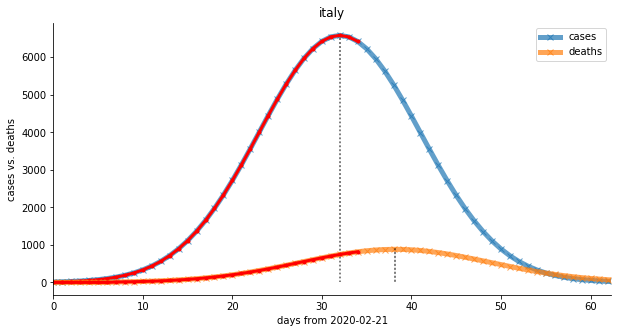

In [6]:
plt.figure(figsize=(10,5))

for col in ['italy',]:
    
    for tmp,lab in zip([cases,deaths],['cases','deaths']):
        
        mindate = min(tmp.loc[tmp[col].notnull()].index)-timedelta(days=1)
        y = tmp.loc[tmp.index>=mindate,col].fillna(0)
        x = np.arange(len(y))

        xdata, ydata, x_axis, y_axis, c = distribution(x,y)
        
        y_div = y_axis*sorted(y.values)[-3]*1.1/max(y_axis[:len(y)])
        
        plt.title('italy')
        
        if lab=='cases':
            plt.plot(x_axis, 
                     y_div, 'x-',lw=5,alpha=.7,label=lab)
            plt.plot(c[1]*np.ones(len(y_div)), 
                     y_div, ':k',alpha=.5)
            plt.plot(x_axis[:len(y)], 
                     y_div[:len(y)], '.-r',lw=3)
            plt.xlabel('days from '+str(mindate)[:10])
        else:
            plt.plot(np.concatenate((np.arange(7),7+x_axis)), 
                     np.concatenate((np.array([0]*7),y_div)), 'x-',lw=5,alpha=.7,label=lab)
            plt.plot((c[1]+7)*np.ones(len(y_div)),
                     y_div, ':k',alpha=.5)
            plt.plot(np.concatenate((np.arange(7),7+x_axis))[:len(y)+7], 
                     np.concatenate((np.array([0]*7),y_div))[:len(y)+7], '.-r',lw=3)
            plt.ylabel('cases vs. deaths')
            
        plt.xlim([0,c[1]*2])
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.legend()
            
plt.show()